# Hands-on Unsupervised Learning
This section is meant for learning the Scikit-Learn APIs end provide a playground for machine learning unsupervised tasks.

[Scikit-Learn](https://scikit-learn.org/stable/index.html#) is a library for data mining and data analysis. It  includes models for classification, regression and clustering. It is built on top of NumPy. SciPy and matplotlib. 

For the purpose of this playground, to get familiar with the Scikit-Learn APis, we would use [Toy Datasets](https://scikit-learn.org/stable/datasets/index.html#toy-datasets) available in the library. 

Datasets in `sklearn.datasets` return a *Bunch*:
> Dictionary-like object, the interesting attributes are: ‘data’, the data to learn, ‘target’, the regression targets, ‘DESCR’, the full description of the dataset, and ‘filename’, the physical location of boston csv dataset (added in version 0.20).

In this notebook we also use the `sklearn.datasets.make_blobs` and `sklearn.datasets.make_moons` functions which is of help in generating synthetic data for unsupervised tasks. See the [Generated datasets](https://scikit-learn.org/stable/datasets/index.html#generated-datasets) section for more details.

### mglearn library 
For visualizing the results obtained with our models we are going to employ an existing library made by Andreas C. Muller (author of the book *Introduction to Machine Learning with Python*). The library is available in the [github repository](https://github.com/amueller/mglearn).

In [1]:
!pip install mglearn 

In [2]:
from sklearn.datasets import load_breast_cancer, make_blobs, fetch_lfw_people, make_moons
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

/home/marco/miniconda3/envs/handson-ml/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/marco/miniconda3/envs/handson-ml/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
breast_ds = load_breast_cancer()
faces_ds = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

## Scaling the data
Here we are going to see how the effect of data scaling has an impact on supervised models before introducing unsupervised models. 

The `MinMaxScaler`, `StandardScaler`, `RobustScaler` e `Normalizer` are sklearn models and follows the same API convention that we have seen in the supervised section. This means you can use `fit()` and `transform()` for preparing the model and then scale the data.

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 1: Scaling Data**
Using the *breast cancer* dataset apply the different scalers and check how data has changed.
- MinMaxScaler: scales features in between the provided ranges 
- RobustScaler: scales the features bases on the quartiles
- StandardScaler: scales the features based on the mean and variance
- Normalzer: normalizes the features in order to have unit norm

You can use the provided function to plot the data and visually see the differences.
</div>

In [4]:
X, y = breast_ds.data, breast_ds.target

In [5]:
X_mms = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
X_rs = RobustScaler().fit_transform(X)
X_ss = StandardScaler().fit_transform(X)
X_n = Normalizer().fit_transform(X)

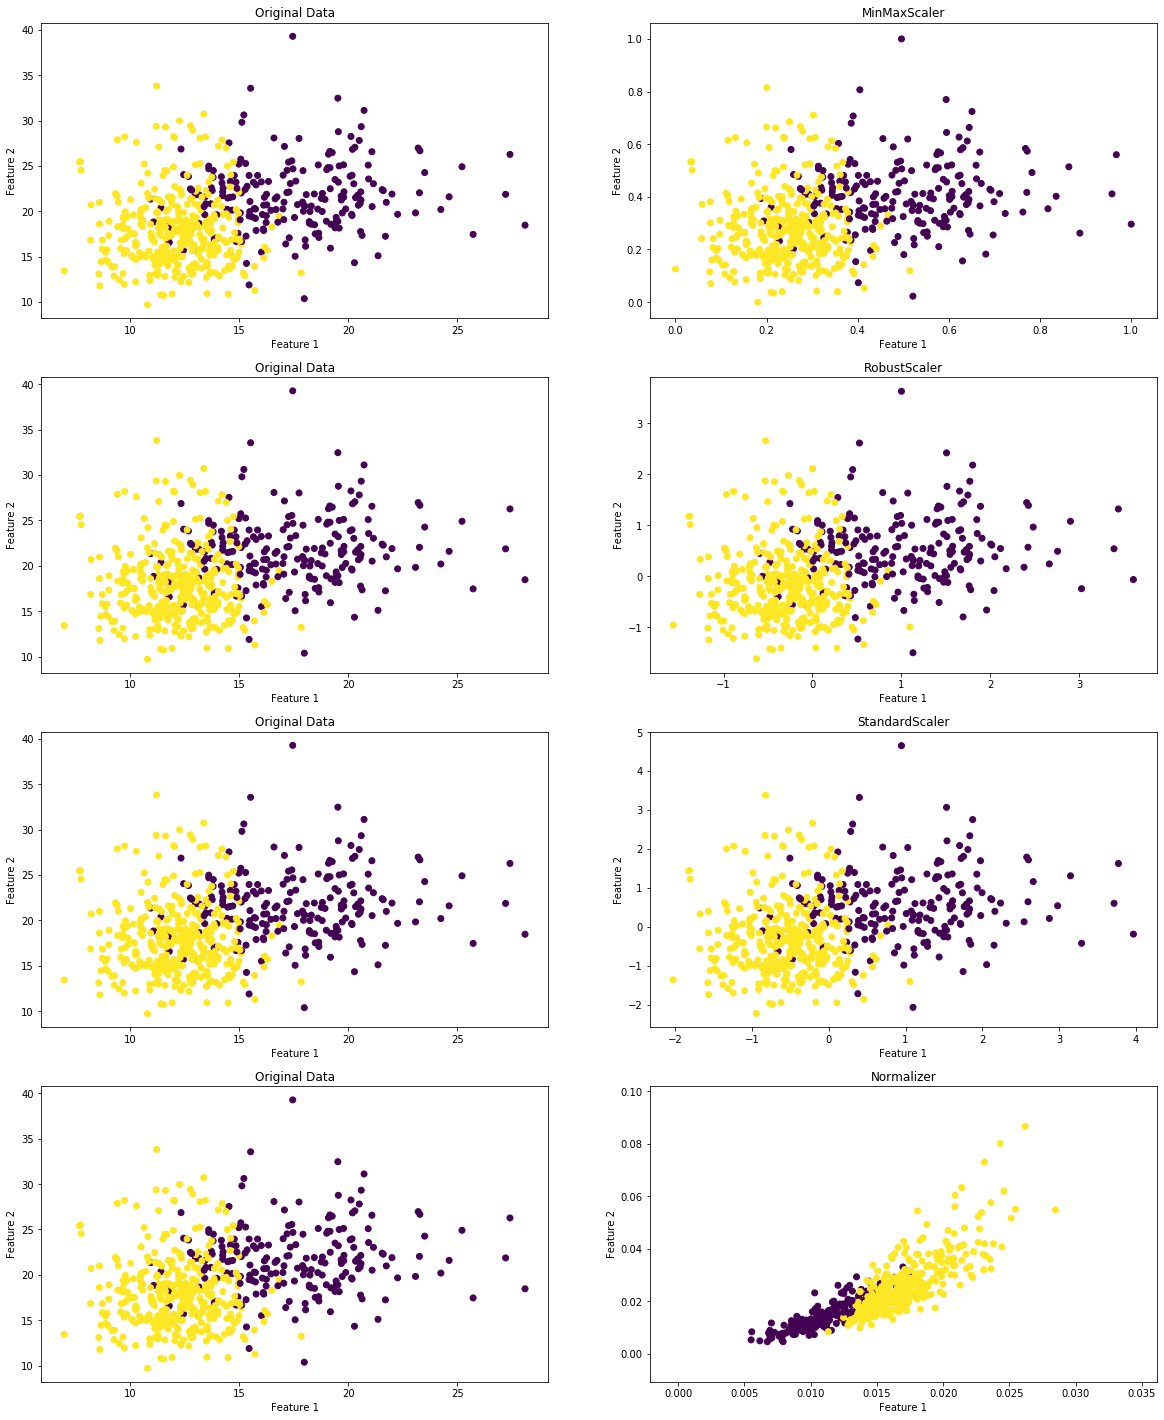

In [6]:
scaled=[X_mms, X_rs, X_ss, X_n]
names = ["MinMaxScaler", "RobustScaler", "StandardScaler", "Normalizer"]

fig, axes = plt.subplots(4, 2, figsize=(20, 25) )
for i, ax_row in enumerate(axes):
    ax_0 = ax_row[0]
    ax_1 = ax_row[1]
    
    ax_0.scatter(X[:, 0], X[:, 1], c=y)
    ax_1.scatter(scaled[i][:, 0], scaled[i][:, 1], c=y)
    ax_0.set_title("Original Data")
    ax_1.set_title(names[i])
    for ax in [ax_0, ax_1]:
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 2: Observing model performances for different scalers**

Using the scaled data observe the response of a model to the different techniques. 

The model for this experiment is a Support Vector Machine (SVM) for classification. For details about this model please refer to the [scikit-learn dedicated page](https://scikit-learn.org/stable/modules/svm.html#svm-classification) to SVM.
</div>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(C=100, gamma="auto", random_state=11)
svc.fit(X_train, y_train)
print("Test Set score for {:>15}: {:.2f}".format("Original", svc.score(X_test, y_test)))

for i, data in enumerate(scaled): 
    X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=0)
    svc = SVC(C=100, gamma="auto", random_state=11)
    svc.fit(X_train, y_train)
    print("Test Set score for {:>15}: {:.2f}".format(names[i], svc.score(X_test, y_test)))
    

Test Set score for        Original: 0.63
Test Set score for    MinMaxScaler: 0.97
Test Set score for    RobustScaler: 0.95
Test Set score for  StandardScaler: 0.97
Test Set score for      Normalizer: 0.90


## Principal Component Analysis
In this section we are going to use PCA for both visualization and features extraction. 

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 3: PCA - Visualization**

We can visualize the *breast cancer* using its first two principal components. 

- Use `sklearn.decomposition.PCA(n_components)` for selecting the number of principal components and extract the first two components with the trained model. 
- Use the provided function `plot_projected_data(X_transformed)` to plot the dataset projected onto the new subspace (defined by the principal components).
- Observe the two components: they are coefficients and define the two vectors of the new subspace. Use the `plot_heatmap_coefficients(model)` to analyze the coefficients.
</div>

In [8]:
pca = PCA(n_components=2)

In [9]:
pca.fit(X_ss)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
X_pca = pca.transform(X_ss)

In [11]:
def plot_projected_data(X_transformed, dataset=breast_ds):
    plt.figure(figsize=(8, 8))
    plt.title("Projected Data")
    mglearn.discrete_scatter(X_transformed[:, 0], X_transformed[:, 1], dataset.target)
    plt.legend(dataset.target_names, loc="best")
    plt.gca().set_aspect("equal")
    plt.xlabel("First principal component", size=13)
    plt.ylabel("Second principal component", size=13)

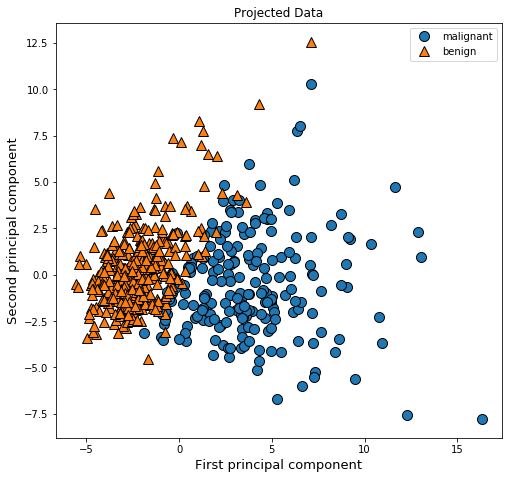

In [12]:
plot_projected_data(X_pca)

In [13]:
def plot_heatmap_coefficients(model, dataset=breast_ds):
    plt.matshow(model.components_, cmap='viridis')
    plt.yticks([0, 1], ["First component", "Second component"])
    plt.colorbar()
    plt.xticks(range(len(dataset.feature_names)),
    dataset.feature_names, rotation=60, ha='left')
    plt.xlabel("Feature")
    plt.ylabel("Principal components")

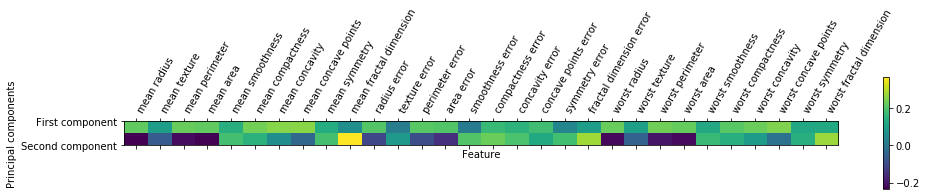

In [14]:
plot_heatmap_coefficients(pca)

<div class="alert alert-warning" role="alert">
    
<img src="./icons/book.png"  width="20" height="20" align="left"> &nbsp;  **Theory: Coefficients interpretability**

Observing the coefficient gives an clue about the correlation between the features for the particular direction. In the case of the first component the are all of the same sign meaning that if we observe points increasing in the component direction also the original features tends to increase as well. 

For the second component is different due to we have mixed signs.

</div>

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 4: PCA - Feature Extraction using Faces dataset**

It is possible to use PCA for feature extraction in order to use the new features for training a supervised model and achieve better results in terms of classification scores.

- Use *faces* dataset to extract different number of components
- Train and test a KNN classifier on the original features
- Train and test a KNN classifier on the extracted feature with PCA
- Plot, using the provided `plot_pca_face_components()` function, the extracted principal components

Data have been prepared in `X_faces` and `y_faces`.
</div>

In [15]:
image_shape = faces_ds.images[0].shape
def plot_pca_face_components(model):
    fix, axes = plt.subplots(3, 5, figsize=(15, 12),
    subplot_kw={'xticks': (), 'yticks': ()})
    for i, (component, ax) in enumerate(zip(model.components_, axes.ravel())):
        ax.imshow(component.reshape(image_shape),cmap='gray')
        ax.set_title("{}. component".format((i + 1)))

In [16]:
X, y = faces_ds.data, faces_ds.target

In [17]:
mask = np.zeros(y.shape, dtype=np.bool)
for target in np.unique(y):
    mask[np.where(y == target)[0][:50]] = 1
X_faces = X[mask] / 255.
y_faces = y[mask]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_faces, y_faces, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.28


In [19]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_100 = pca.transform(X_train)
X_test_100 = pca.transform(X_test)

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_100, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_100, y_test)))

Test set accuracy: 0.33


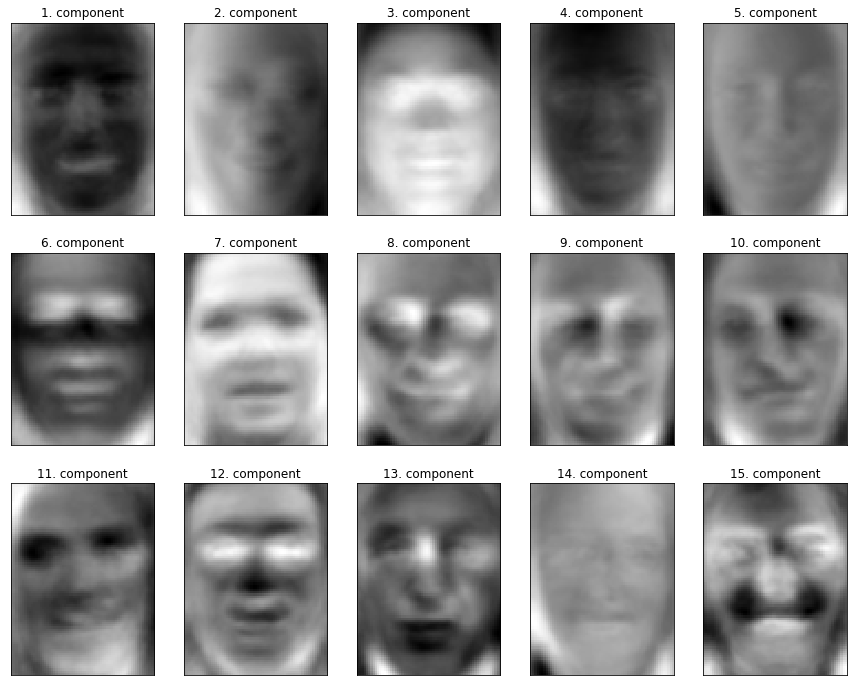

In [21]:
plot_pca_face_components(pca)

## Clustering
Finally we look into unsupervised learning models and in particular we are going to see **K-Meams** and **DBSCAN**. 

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 5: K-Means**
- generate a random dataset with `make_blob()` (by default it has 2 features and 100 samples)
- plot the generated random dataset using the `plot_blob(data)` function
- apply kmeans to the random dataset using `KMeans(n_clusters=3)`
- plot the results with the provided `plot_clusters(data, model)` function 
</div>

In [22]:
def plot_clusters(data, model):
    # from sklearn 
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=[10,7])
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Pastel1, alpha=0.7,
               aspect='auto', origin='lower')

    plt.plot(data[:, 0], data[:, 1], '.', markersize=10)
    # Plot the centroids as a white X
    centroids = model.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=20, linewidths=3,
                color='r', zorder=10)
    plt.title('K-means clustering', size=15)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel("feature 1", size=13)
    plt.ylabel("feature 2", size=13)
    plt.show()

In [23]:
def plot_blob(data):
    f = plt.figure(figsize=[10,7])
    ax = f.add_subplot()
    ax.scatter(X[:, 0], X[:, 1])
    ax.set_title("Scatter Plot of random blobs", fontdict={'fontsize':15})
    ax.set_xlabel("feature 1", fontdict={'fontsize':13})
    ax.set_ylabel("feature 2", fontdict={'fontsize':13})

In [24]:
X, y  = make_blobs(random_state=10)

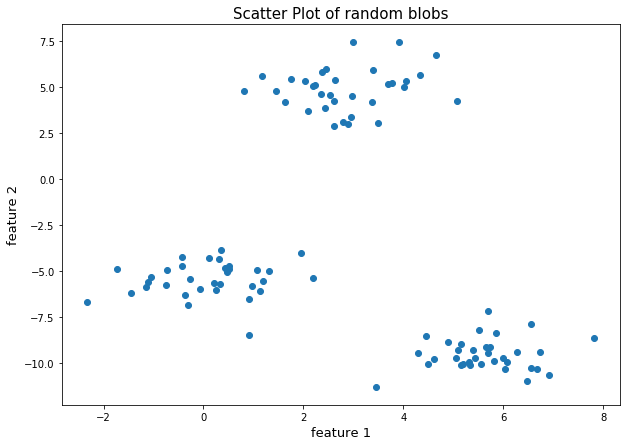

In [25]:
plot_blob(X)

In [91]:
km = KMeans(n_clusters=3, init=np.array([[-200, -1000], [-200, -1000], [-200, -1000]]), max_iter=10)

In [92]:
km.fit(X)

/home/marco/miniconda3/envs/handson-ml/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:972: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True,
       init=array([[ -200, -1000],
       [ -200, -1000],
       [ -200, -1000]]),
       max_iter=10, n_clusters=3, n_init=10, n_jobs=None,
       precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [93]:
km.cluster_centers_

array([[ 2.89504171, -7.53408753],
       [ 3.98920748,  5.80722659],
       [ 2.34107224,  4.44587275]])

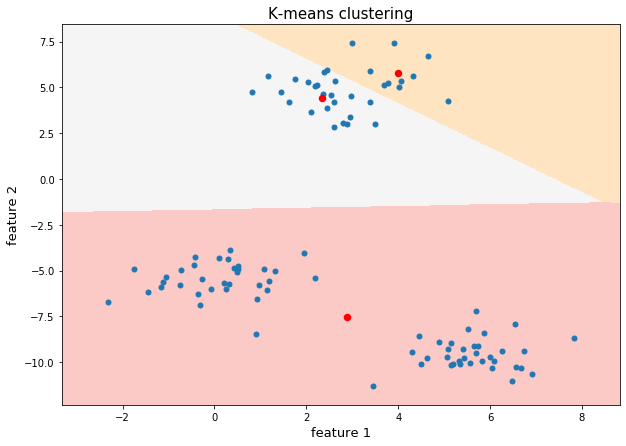

In [94]:
plot_clusters(X, km)

<div class="alert alert-danger" role="alert">
    
<img src="./icons/chemistry.png"  width="20" height="20" align="left"> &nbsp;  **Task 1**:  Try different values of k and plot the results.
</div>

<hr>


### When K-Means fails
K-means has some drawbacks: 
- it considers only convex shapes (radius of the cluster's centroids)
- it assumes cluster of the same size (diameter)
- it does not take into account directions' importance 
- k as hyperparameter

Lets consider two cases when kmeans fails to identify potentially "meaningful" clusters. The two dataset are already given for this purpose. Then we will see a different model which can solve these limitations.

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 6: K-Means Failure**
- use the `X_blob` to fit and plot the result of kmeans on a stretched blob dataset
- use the `X_moons` to fit and plot the result of kmeans on the moons dataset
</div>

In [29]:
X_blob, y_blob = make_blobs(random_state=110, n_samples=600)
rng = np.random.RandomState(1200)
transformation = rng.normal(size=(2, 2))
X_blob = np.dot(X_blob, transformation)

In [30]:
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=10)

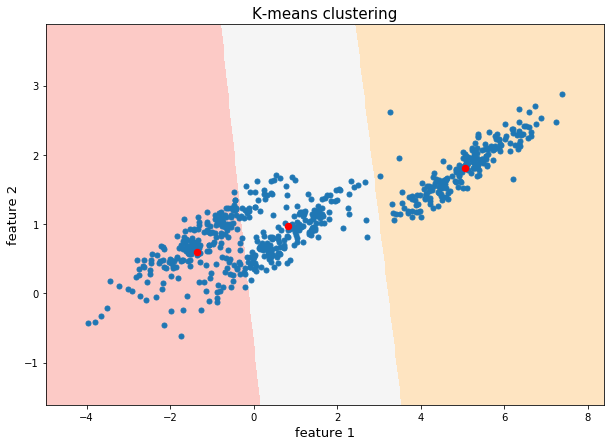

In [31]:
kmb = KMeans(n_clusters=3)
kmb.fit(X_blob)
plot_clusters(X_blob, kmb)

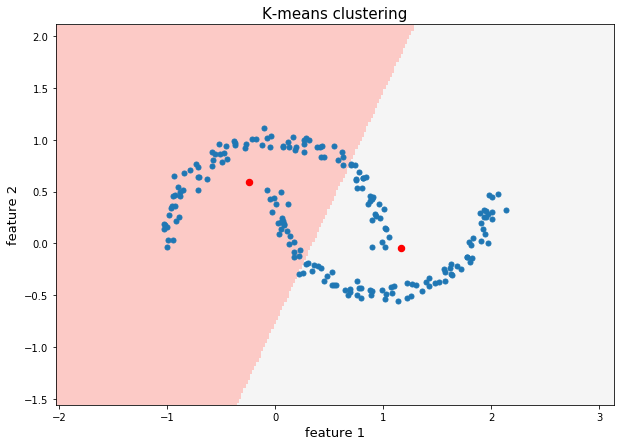

In [32]:
kmm = KMeans(n_clusters=2)
kmm.fit(X_moons)
plot_clusters(X_moons, kmm)

### Use DBSCAN
We use a more sophisticated clustering algorithm which creates cluster bases on the data point density. One of the advantages of DBSCAN is the needless of setting a k value. For more details about DBSCAN see the scikit-learn [dedicated page](https://scikit-learn.org/stable/modules/clustering.html#dbscan).

<div class="alert alert-info" role="alert">
    
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp;  **Exercise 7: DBSCAN**
- use DBSCAN to solve the above problems (reuse the already provided data)
- try different parameters for DBSCAN: 
    - `eps`: set this to implicitly control the number of clusters
    - `min_sample`: in less dense regions determines if a point a noise one or belonging to a cluster
- use the `plot_dbscan_cluster()` to observe the results
</div>

In [135]:
def plot_dbscan_clusters(model, data):
    core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
    core_samples_mask[model.core_sample_indices_] = True
    labels = model.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    plt.figure(figsize=[10, 7])
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = data[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_, size=15)
    plt.xlabel("feature 1", size=13)
    plt.ylabel("feature 2", size=13)
    plt.show()

In [131]:
dbscan = DBSCAN(eps=0.2, min_samples=3)

In [132]:
dbscan.fit(X_blob)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

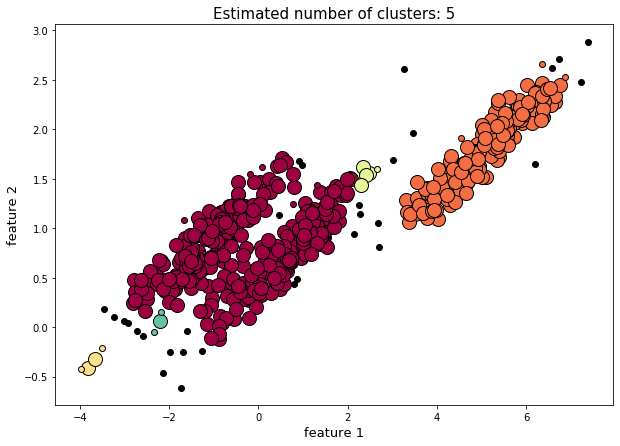

In [136]:
plot_dbscan_clusters(dbscan, X_blob)

<hr>

<div hidden=True>
<img src="./icons/list.png"  width="20" height="20" align="left"> &nbsp; Icon made by <a href="https://www.flaticon.com/authors/smashicons" title="Smashicons">Smashicons</a> from <a href="https://www.flaticon.com/"             title="Flaticon">www.flaticon.com</a>

<img src="./icons/lightbulb.png"  width="20" height="20" align="left"> &nbsp;Icon made by <a href="https://www.flaticon.com/authors/pixelmeetup" title="Pixelmeetup">Pixelmeetup</a> from <a href="https://www.flaticon.com/"             title="Flaticon">www.flaticon.com</a>

<img src="./icons/new.png"  width="20" height="20" align="left"> &nbsp; Icon made by <a href="https://www.flaticon.com/authors/pixel-perfect" title="Pixel perfect">Pixel perfect</a> from <a href="https://www.flaticon.com/"             title="Flaticon">www.flaticon.com</a>

<img src="./icons/chemistry.png"  width="20" height="20" align="left"> &nbsp; Icon made by <a href="https://www.flaticon.com/authors/popcorns-arts" title="Icon Pond">Icon Pond</a> from <a href="https://www.flaticon.com/"             title="Flaticon">www.flaticon.com</a>

<img src="./icons/book.png"  width="20" height="20" align="left"> &nbsp; Icon made by <a href="https://www.flaticon.com/authors/popcorns-arts" title="Icon Pond">Icon Pond</a> from <a href="https://www.flaticon.com/"             title="Flaticon">www.flaticon.com</a>
    
</div>